In [1]:
from sklearn.neural_network import MLPClassifier as mlp
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'robot_dataset.csv')
data

,Unnamed: 0,front_distance,back_distance,left_distance,right_distance,action
0,0,112.362036,174.233713,84.776390,47.116193,retreat
1,1,285.214292,158.091495,137.602977,28.652630,advance
2,2,219.598183,105.311085,29.764649,41.381760,advance
3,3,179.597545,147.963797,134.051108,142.046819,advance
4,4,46.805592,109.528991,60.924405,265.360207,turn_right
...,...,...,...,...,...,...
99995,99995,237.691449,186.644990,27.843197,225.044485,advance
99996,99996,233.775869,188.766151,187.689432,81.758344,advance
99997,99997,202.336022,57.661103,187.998499,172.676609,advance
99998,99998,149.834173,195.924807,14.294983,268.001937,turn_right


In [3]:
print(data.shape)
data = data.dropna(axis = 0)
print(data.shape)

(100000, 6)
(100000, 6)


In [4]:
data = data.iloc[:,1:6]
data

,front_distance,back_distance,left_distance,right_distance,action
0,112.362036,174.233713,84.776390,47.116193,retreat
1,285.214292,158.091495,137.602977,28.652630,advance
2,219.598183,105.311085,29.764649,41.381760,advance
3,179.597545,147.963797,134.051108,142.046819,advance
4,46.805592,109.528991,60.924405,265.360207,turn_right
...,...,...,...,...,...
99995,237.691449,186.644990,27.843197,225.044485,advance
99996,233.775869,188.766151,187.689432,81.758344,advance
99997,202.336022,57.661103,187.998499,172.676609,advance
99998,149.834173,195.924807,14.294983,268.001937,turn_right


In [5]:
output_code ={
    'advance':1,
    'turn_right':2,
    'turn_left':3,
    'retreat':4
}
code ={
    1:'advance',
    2:'turn_right',
    3:'turn_left',
    4:'retreat'
}

In [6]:
data = data.replace({
    'advance':output_code['advance'],
    'turn_right':output_code['turn_right'],
    'turn_left':output_code['turn_left'],
    'retreat':output_code['retreat'],
})
print(data)

       front_distance  back_distance  left_distance  right_distance  action
0          112.362036     174.233713      84.776390       47.116193       4
1          285.214292     158.091495     137.602977       28.652630       1
2          219.598183     105.311085      29.764649       41.381760       1
3          179.597545     147.963797     134.051108      142.046819       1
4           46.805592     109.528991      60.924405      265.360207       2
...               ...            ...            ...             ...     ...
99995      237.691449     186.644990      27.843197      225.044485       1
99996      233.775869     188.766151     187.689432       81.758344       1
99997      202.336022      57.661103     187.998499      172.676609       1
99998      149.834173     195.924807      14.294983      268.001937       2
99999      116.972546       0.468024     211.223173      150.726795       3

[100000 rows x 5 columns]


In [7]:
from sklearn.preprocessing import MinMaxScaler 
from tensorflow.keras.utils import to_categorical

In [8]:
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(data.iloc[:20000,:4])

In [9]:
X_train_minmax.shape

(20000, 4)

In [10]:
# encoder = OneHotEncoder()
Y = to_categorical(data.iloc[:20000,4:5])
Y = Y[:,1:]
Y

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [11]:
from sklearn.model_selection import train_test_split
# X_train_minmax = X_train_minmax[:10000 ,:]
# Y=Y[:10000,:]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X_train_minmax, Y, test_size=0.3,random_state=42)
All_x_train = X_train_minmax
All_y_train = Y
x_train.shape


(14000, 4)

# scatter plot

(14000, 2)
(14000, 1)
          0         1  action
0  0.614050  0.471368       4
1  0.214123  0.981342       1
2  0.011189  0.132077       1
3  0.024422  0.845788       1
4  0.181067  0.753994       2


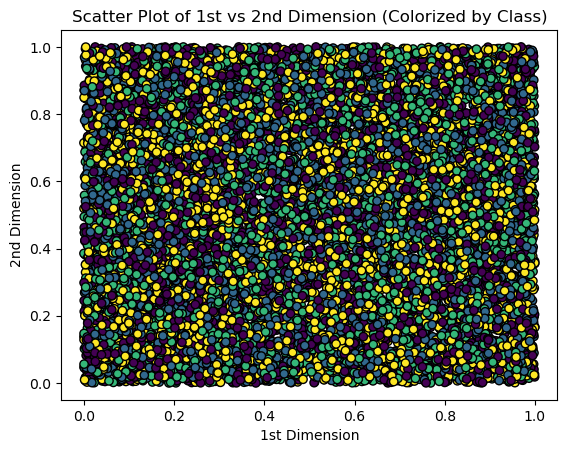

In [17]:
scatter_data = pd.DataFrame(x_train[:,:2])
print(scatter_data.shape)
print(data.iloc[:14000,4:5].shape)
scatter_data['action']= data.iloc[:14000,4:5].values

class_colors = ['r', 'b', 'g', 'p']

print(scatter_data.head())

plt.scatter(scatter_data.iloc[:, 0], scatter_data.iloc[:, 1],
            c=scatter_data['action'], edgecolors='k', facecolors=class_colors)
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.title('Scatter Plot of 1st vs 2nd Dimension (Colorized by Class)')
plt.show()

In [18]:
    import tensorflow as tf
    from tensorflow.keras import layers as L

In [19]:
model = tf.keras.Sequential([
    L.Input(shape = (4,)),
    L.Dense(units=8 ,activation = 'relu'),
    L.Dropout(rate = 0.2),
    L.Dense(units=4 ,activation = 'relu'),
#     L.Dropout(rate = 0.2),
    L.Dense(units=4 ,activation = 'softmax')
])

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['categorical_accuracy']
)

In [21]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100


438/438 [==============================] - 3s 2ms/step - loss: 0.9450 - categorical_accuracy: 0.5945
Epoch 2/100
438/438 [==============================] - 1s 2ms/step - loss: 0.6346 - categorical_accuracy: 0.7690
Epoch 3/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5913 - categorical_accuracy: 0.7907
Epoch 4/100
438/438 [==============================] - 1s 3ms/step - loss: 0.5733 - categorical_accuracy: 0.7930
Epoch 5/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5656 - categorical_accuracy: 0.7934
Epoch 6/100
438/438 [==============================] - 1s 3ms/step - loss: 0.5741 - categorical_accuracy: 0.7935
Epoch 7/100
438/438 [==============================] - 1s 3ms/step - loss: 0.5623 - categorical_accuracy: 0.7964
Epoch 8/100
438/438 [==============================] - 1s 3ms/step - loss: 0.5735 - categorical_accuracy: 0.7913
Epoch 9/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5921 - categorica

In [23]:
y_predict = model.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_predict= np.argmax( y_predict,axis= 1)
print(y_predict)
print('*'*50)
print(y_test_)

y_test_ = np.argmax(y_test,axis= 1)
# print(y_predict)
# print(y_test)
# Evaluate the model
accuracy = accuracy_score(y_test_, y_predict)
precision = precision_score(y_test_, y_predict, average='weighted')
recall = recall_score(y_test_, y_predict, average='weighted')
f1 = f1_score(y_test_, y_predict, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print(np.argmax(model.predict(np.array([[200,100,100,300]])),axis= 1)+1)


188/188 [==============================] - 0s 2ms/step
[0 2 3 ... 1 3 0]
**************************************************
       action
50000       3
50001       4
50002       4
50003       4
50004       4
...       ...
99995       1
99996       1
99997       1
99998       2
99999       3

[50000 rows x 1 columns]
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
1/1 [==============================] - 0s 37ms/step
[2]


In [24]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['categorical_accuracy']
)

In [25]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
438/438 [==============================] - 2s 2ms/step - loss: 0.5627 - categorical_accuracy: 0.8011
Epoch 2/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5743 - categorical_accuracy: 0.8034
Epoch 3/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5552 - categorical_accuracy: 0.8114
Epoch 4/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5559 - categorical_accuracy: 0.8125
Epoch 5/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5553 - categorical_accuracy: 0.8106
Epoch 6/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5468 - categorical_accuracy: 0.8131
Epoch 7/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5637 - categorical_accuracy: 0.8078
Epoch 8/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5641 - categorical_accuracy: 0.8104
Epoch 9/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5529 - categorical_

In [26]:
y_predict = model.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_predict= np.argmax( y_predict,axis= 1)
y_test_ = np.argmax(y_test,axis= 1)
# print(y_predict)
# print(y_test)
# Evaluate the model
accuracy = accuracy_score(y_test_, y_predict)
precision = precision_score(y_test_, y_predict, average='weighted')
recall = recall_score(y_test_, y_predict, average='weighted')
f1 = f1_score(y_test_, y_predict, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
preProcessing= MinMaxScaler()
scaled_data = np.array([[2090,122,3,300]],dtype = float)
print(scaled_data)
# scaled_data = preProcessing.fit_transform(scaled_data)

print(scaled_data)
print(np.argmax(model.predict(scaled_data),axis= 1)+1)


188/188 [==============================] - 0s 2ms/step
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
[[2090.  122.    3.  300.]]
[[2090.  122.    3.  300.]]
1/1 [==============================] - 0s 24ms/step
[1]


In [27]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['categorical_accuracy']
)
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
438/438 [==============================] - 2s 2ms/step - loss: 0.5549 - categorical_accuracy: 0.8098
Epoch 2/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5627 - categorical_accuracy: 0.8136
Epoch 3/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5716 - categorical_accuracy: 0.8066
Epoch 4/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5551 - categorical_accuracy: 0.8124
Epoch 5/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5600 - categorical_accuracy: 0.8101
Epoch 6/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5607 - categorical_accuracy: 0.8089
Epoch 7/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5440 - categorical_accuracy: 0.8169
Epoch 8/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5786 - categorical_accuracy: 0.8007
Epoch 9/100
438/438 [==============================] - 1s 2ms/step - loss: 0.5608 - categorical_

In [30]:
y_predict = model.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_predict= np.argmax( y_predict,axis= 1)
y_test_ = np.argmax(y_test,axis= 1)
# print(y_predict)
# print(y_test)
# Evaluate the model
accuracy = accuracy_score(y_test_, y_predict)
precision = precision_score(y_test_, y_predict, average='weighted')
recall = recall_score(y_test_, y_predict, average='weighted')
f1 = f1_score(y_test_, y_predict, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print(np.argmax(model.predict(np.array([[200,100,300,300]])),axis= 1)+1)


188/188 [==============================] - 0s 2ms/step
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
1/1 [==============================] - 0s 21ms/step
[3]


In [29]:
import joblib as jb
jb.dump(model ,r'C:\Users\n\Desktop\apprentisage2.joblib')

['C:\\Users\\n\\Desktop\\apprentisage2.joblib']

In [31]:
from sklearn.model_selection import cross_val_score
from scikeras.wrappers import KerasClassifier

In [ ]:
# from sklearn.model_selection import GridSearchCV

# cross validation 

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
def create_model_with_16Unites():
    model = tf.keras.Sequential([
        L.Input(shape = (4,)),
        L.Dense(units=32 ,activation = 'relu'),
        L.Dense(units=16 ,activation = 'relu'),
        L.Dense(units=4 ,activation = 'softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['mse', 'categorical_accuracy']
    )
    return model


In [34]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
print(y_train)

model_II = KerasClassifier(model=create_model_with_16Unites, epochs=10 )

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [35]:
scores = cross_val_score(model_II, x_train, y_train, cv=5)

Epoch 1/10
350/350 [==============================] - 2s 2ms/step - loss: 0.9252 - mse: 0.1233 - categorical_accuracy: 0.7226
Epoch 2/10
350/350 [==============================] - 1s 2ms/step - loss: 0.3120 - mse: 0.0386 - categorical_accuracy: 0.9559
Epoch 3/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1998 - mse: 0.0246 - categorical_accuracy: 0.9694
Epoch 4/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1585 - mse: 0.0195 - categorical_accuracy: 0.9745
Epoch 5/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1343 - mse: 0.0165 - categorical_accuracy: 0.9769
Epoch 6/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1194 - mse: 0.0147 - categorical_accuracy: 0.9789
Epoch 7/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1075 - mse: 0.0132 - categorical_accuracy: 0.9807
Epoch 8/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0978 - mse: 0.0120 - categorical_accuracy:

In [36]:
scores

array([0.97964286, 0.975     , 0.98607143, 0.98535714, 0.98107143])

In [37]:
print("The score of cross validation is :: ", scores.mean())

The score of cross validation is ::  0.9814285714285713


# Cross Validation With Difference models

In [38]:
def create_model_with_8Unites():
    model = tf.keras.Sequential([
        L.Input(shape = (4,)),
        L.Dense(units=8 ,activation = 'relu'),
        L.Dense(units=8 ,activation = 'relu'),
        L.Dense(units=4 ,activation = 'softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['mse', 'categorical_accuracy']
    )
    return model
def create_model_with_4Unites():
    model = tf.keras.Sequential([
        L.Input(shape = (4,)),
        L.Dense(units=4 ,activation = 'relu'),
        L.Dense(units=4 ,activation = 'relu'),
        L.Dense(units=4 ,activation = 'softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['mse', 'categorical_accuracy']
    )
    return model
# ------------------------------------------
def create_model_with_16Unites_and_sigmoid():
    model = tf.keras.Sequential([
        L.Input(shape = (4,)),
        L.Dense(units=16 ,activation = 'sigmoid'),
        L.Dense(units=16 ,activation = 'sigmoid'),
        L.Dense(units=4 ,activation = 'softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['mse', 'categorical_accuracy']
    )
    return model
def create_model_with_8Unites_and_sigmoid():
    model = tf.keras.Sequential([
        L.Input(shape = (4,)),
        L.Dense(units=8 ,activation = 'sigmoid'),
        L.Dense(units=8 ,activation = 'sigmoid'),
        L.Dense(units=4 ,activation = 'softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['mse', 'categorical_accuracy']
    )
    return model
def create_model_with_4Unites_and_sigmoid():
    model = tf.keras.Sequential([
        L.Input(shape = (4,)),
        L.Dense(units=4 ,activation = 'sigmoid'),
        L.Dense(units=4 ,activation = 'sigmoid'),
        L.Dense(units=4 ,activation = 'softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['mse', 'categorical_accuracy']
    )
    return model



In [39]:
models_after_cross_v = {}
def Cross_validation_toAll_models(models = [create_model_with_16Unites(),] ):
    models_score = []
    i = 0
    names =['model_with_16unites-relu-' ,'model_with_8unites-relu-','model_with_4unites-relu',
           'model_with_16unites-sigmoid-','model_with_8unites-sigmoid-','model_with_4unites-sigmoid-']
    for model,name in zip(models ,names):
        i +=1
        print(f'*'*30 +' Model number '+ str(i) +' --"'+name +'"--'+'*'*30 ,end='\n\n\n')
        kerasModel = KerasClassifier(model=model, epochs=10 )
        models_score.append(cross_val_score(kerasModel ,All_x_train ,All_y_train ,cv =5))
        models_after_cross_v[name] =model
    return models_score


In [40]:
create_model_with_16unites = create_model_with_16Unites()
create_model_with_8unites = create_model_with_8Unites()
create_model_with_4unites = create_model_with_4Unites()
create_model_with_16unites_and_sigmoid = create_model_with_16Unites_and_sigmoid()
create_model_with_8unites_and_sigmoid = create_model_with_8Unites_and_sigmoid()
create_model_with_4unites_and_sigmoid = create_model_with_4Unites_and_sigmoid()


models_scores = Cross_validation_toAll_models([
    create_model_with_16unites,
    create_model_with_8unites,
    create_model_with_4unites,
    create_model_with_16unites_and_sigmoid,
    create_model_with_8unites_and_sigmoid,
    create_model_with_4unites_and_sigmoid
    
])
models_scores

****************************** Model number 1 --"model_with_16unites-relu-"--******************************


INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmp9ouqn_2n\assets


INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmp9ouqn_2n\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 0.6757 - mse: 0.0887 - categorical_accuracy: 0.8510
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2210 - mse: 0.0273 - categorical_accuracy: 0.9651
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1564 - mse: 0.0193 - categorical_accuracy: 0.9744
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1280 - mse: 0.0160 - categorical_accuracy: 0.9765
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1112 - mse: 0.0140 - categorical_accuracy: 0.9767
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0981 - mse: 0.0122 - categorical_accuracy: 0.9801
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0894 - mse: 0.0112 - categorical_accuracy: 0.9820
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0830 - mse: 0.0105 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpw_5w4w31\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 0.6731 - mse: 0.0883 - categorical_accuracy: 0.8536
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2184 - mse: 0.0270 - categorical_accuracy: 0.9657
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1542 - mse: 0.0191 - categorical_accuracy: 0.9737
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1251 - mse: 0.0155 - categorical_accuracy: 0.9785
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1084 - mse: 0.0135 - categorical_accuracy: 0.9803
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0970 - mse: 0.0121 - categorical_accuracy: 0.9822
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0878 - mse: 0.0110 - categorical_accuracy: 0.9814
Epoch 8/10
500/500 [==============================] - 1s 3ms/step - loss: 0.0808 - mse: 0.0101 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmp0ezzntsv\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 0.6688 - mse: 0.0877 - categorical_accuracy: 0.8562
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2165 - mse: 0.0268 - categorical_accuracy: 0.9664
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1536 - mse: 0.0190 - categorical_accuracy: 0.9747
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1266 - mse: 0.0159 - categorical_accuracy: 0.9747
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1087 - mse: 0.0136 - categorical_accuracy: 0.9791
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0966 - mse: 0.0120 - categorical_accuracy: 0.9812
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0884 - mse: 0.0111 - categorical_accuracy: 0.9802
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0818 - mse: 0.0103 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpaso7txjq\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 0.6713 - mse: 0.0881 - categorical_accuracy: 0.8500
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2162 - mse: 0.0264 - categorical_accuracy: 0.9702
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1517 - mse: 0.0186 - categorical_accuracy: 0.9764
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1238 - mse: 0.0153 - categorical_accuracy: 0.9791
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1068 - mse: 0.0132 - categorical_accuracy: 0.9808
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0960 - mse: 0.0120 - categorical_accuracy: 0.9803
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0853 - mse: 0.0105 - categorical_accuracy: 0.9840
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0798 - mse: 0.0100 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpaz3aanhb\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 0.6612 - mse: 0.0866 - categorical_accuracy: 0.8568
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2131 - mse: 0.0262 - categorical_accuracy: 0.9682
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1511 - mse: 0.0187 - categorical_accuracy: 0.9744
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1244 - mse: 0.0156 - categorical_accuracy: 0.9757
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1073 - mse: 0.0134 - categorical_accuracy: 0.9797
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0964 - mse: 0.0121 - categorical_accuracy: 0.9802
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0863 - mse: 0.0107 - categorical_accuracy: 0.9833
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0809 - mse: 0.0102 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpah3qjt9v\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.1010 - mse: 0.1498 - categorical_accuracy: 0.5795
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 0.5929 - mse: 0.0798 - categorical_accuracy: 0.8144
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3283 - mse: 0.0415 - categorical_accuracy: 0.9312
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2335 - mse: 0.0290 - categorical_accuracy: 0.9571
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1894 - mse: 0.0235 - categorical_accuracy: 0.9666
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1639 - mse: 0.0204 - categorical_accuracy: 0.9717
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1464 - mse: 0.0182 - categorical_accuracy: 0.9736
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1341 - mse: 0.0168 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpwbq7f1ok\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.1038 - mse: 0.1504 - categorical_accuracy: 0.5771
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 0.6097 - mse: 0.0822 - categorical_accuracy: 0.8022
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3257 - mse: 0.0413 - categorical_accuracy: 0.9346
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2211 - mse: 0.0273 - categorical_accuracy: 0.9645
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1781 - mse: 0.0219 - categorical_accuracy: 0.9707
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1540 - mse: 0.0190 - categorical_accuracy: 0.9751
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1374 - mse: 0.0170 - categorical_accuracy: 0.9770
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1249 - mse: 0.0154 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpglwco_q8\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.1059 - mse: 0.1506 - categorical_accuracy: 0.5792
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 0.5754 - mse: 0.0767 - categorical_accuracy: 0.8229
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2991 - mse: 0.0373 - categorical_accuracy: 0.9470
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2158 - mse: 0.0266 - categorical_accuracy: 0.9638
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1770 - mse: 0.0218 - categorical_accuracy: 0.9722
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1531 - mse: 0.0189 - categorical_accuracy: 0.9760
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1373 - mse: 0.0170 - categorical_accuracy: 0.9758
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1251 - mse: 0.0155 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpih5ggqwx\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.0988 - mse: 0.1494 - categorical_accuracy: 0.5764
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 0.6007 - mse: 0.0803 - categorical_accuracy: 0.8087
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3268 - mse: 0.0410 - categorical_accuracy: 0.9415
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2265 - mse: 0.0277 - categorical_accuracy: 0.9678
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1819 - mse: 0.0222 - categorical_accuracy: 0.9751
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1563 - mse: 0.0191 - categorical_accuracy: 0.9768
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1382 - mse: 0.0169 - categorical_accuracy: 0.9798
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1254 - mse: 0.0153 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpz_der_8_\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.1033 - mse: 0.1502 - categorical_accuracy: 0.5782
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 0.6045 - mse: 0.0810 - categorical_accuracy: 0.8091
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3302 - mse: 0.0417 - categorical_accuracy: 0.9371
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2341 - mse: 0.0290 - categorical_accuracy: 0.9599
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1891 - mse: 0.0234 - categorical_accuracy: 0.9670
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1628 - mse: 0.0201 - categorical_accuracy: 0.9737
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1458 - mse: 0.0181 - categorical_accuracy: 0.9754
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1331 - mse: 0.0166 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpj1lxw44u\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.2386 - mse: 0.1701 - categorical_accuracy: 0.4773
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.0074 - mse: 0.1392 - categorical_accuracy: 0.6329
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8397 - mse: 0.1187 - categorical_accuracy: 0.6541
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7688 - mse: 0.1111 - categorical_accuracy: 0.6599
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7345 - mse: 0.1076 - categorical_accuracy: 0.6631
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7146 - mse: 0.1057 - categorical_accuracy: 0.6651
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7018 - mse: 0.1044 - categorical_accuracy: 0.6665
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.6931 - mse: 0.1036 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpzg09yqmn\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.2359 - mse: 0.1699 - categorical_accuracy: 0.4851
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.0058 - mse: 0.1393 - categorical_accuracy: 0.6326
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8405 - mse: 0.1190 - categorical_accuracy: 0.6534
Epoch 4/10
500/500 [==============================] - 1s 3ms/step - loss: 0.7701 - mse: 0.1115 - categorical_accuracy: 0.6583
Epoch 5/10
500/500 [==============================] - 2s 3ms/step - loss: 0.7359 - mse: 0.1080 - categorical_accuracy: 0.6622
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7157 - mse: 0.1059 - categorical_accuracy: 0.6650
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7027 - mse: 0.1046 - categorical_accuracy: 0.6668
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.6933 - mse: 0.1037 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpbv27nei5\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.2375 - mse: 0.1700 - categorical_accuracy: 0.4773
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.0087 - mse: 0.1395 - categorical_accuracy: 0.6304
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8404 - mse: 0.1190 - categorical_accuracy: 0.6528
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7704 - mse: 0.1115 - categorical_accuracy: 0.6588
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7364 - mse: 0.1080 - categorical_accuracy: 0.6624
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7167 - mse: 0.1061 - categorical_accuracy: 0.6652
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7038 - mse: 0.1047 - categorical_accuracy: 0.6679
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.6946 - mse: 0.1038 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpp_5w6au4\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.2356 - mse: 0.1699 - categorical_accuracy: 0.4866
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 0.9995 - mse: 0.1385 - categorical_accuracy: 0.6339
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8352 - mse: 0.1184 - categorical_accuracy: 0.6539
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7653 - mse: 0.1107 - categorical_accuracy: 0.6599
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7317 - mse: 0.1072 - categorical_accuracy: 0.6636
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7119 - mse: 0.1052 - categorical_accuracy: 0.6662
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.6990 - mse: 0.1039 - categorical_accuracy: 0.6672
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.6896 - mse: 0.1029 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmp55bdhbob\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.2396 - mse: 0.1703 - categorical_accuracy: 0.4873
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.0034 - mse: 0.1388 - categorical_accuracy: 0.6349
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8346 - mse: 0.1181 - categorical_accuracy: 0.6572
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7651 - mse: 0.1108 - categorical_accuracy: 0.6624
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7317 - mse: 0.1074 - categorical_accuracy: 0.6642
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7131 - mse: 0.1057 - categorical_accuracy: 0.6659
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7004 - mse: 0.1045 - categorical_accuracy: 0.6689
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.6918 - mse: 0.1036 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpj5hh221u\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.3748 - mse: 0.1862 - categorical_accuracy: 0.3571
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.2424 - mse: 0.1688 - categorical_accuracy: 0.6802
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.9039 - mse: 0.1214 - categorical_accuracy: 0.8474
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.5688 - mse: 0.0727 - categorical_accuracy: 0.9294
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3951 - mse: 0.0487 - categorical_accuracy: 0.9646
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3104 - mse: 0.0379 - categorical_accuracy: 0.9705
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2617 - mse: 0.0319 - categorical_accuracy: 0.9725
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2296 - mse: 0.0280 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpb6t9u1he\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.3753 - mse: 0.1862 - categorical_accuracy: 0.3451
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.2412 - mse: 0.1686 - categorical_accuracy: 0.6976
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8993 - mse: 0.1207 - categorical_accuracy: 0.8493
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.5681 - mse: 0.0726 - categorical_accuracy: 0.9312
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3967 - mse: 0.0490 - categorical_accuracy: 0.9607
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3119 - mse: 0.0381 - categorical_accuracy: 0.9698
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2632 - mse: 0.0321 - categorical_accuracy: 0.9714
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2306 - mse: 0.0281 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpq4k2olsl\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.3773 - mse: 0.1865 - categorical_accuracy: 0.3789
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.2505 - mse: 0.1698 - categorical_accuracy: 0.6768
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.9177 - mse: 0.1234 - categorical_accuracy: 0.8319
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.5771 - mse: 0.0740 - categorical_accuracy: 0.9251
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3991 - mse: 0.0493 - categorical_accuracy: 0.9591
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3130 - mse: 0.0383 - categorical_accuracy: 0.9672
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2638 - mse: 0.0322 - categorical_accuracy: 0.9707
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2311 - mse: 0.0282 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmprsbpx8yx\assets


Epoch 1/10
500/500 [==============================] - 1s 2ms/step - loss: 1.3781 - mse: 0.1866 - categorical_accuracy: 0.3782
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.2508 - mse: 0.1699 - categorical_accuracy: 0.6870
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.9236 - mse: 0.1242 - categorical_accuracy: 0.8440
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.5833 - mse: 0.0747 - categorical_accuracy: 0.9229
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.4014 - mse: 0.0495 - categorical_accuracy: 0.9638
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3132 - mse: 0.0381 - categorical_accuracy: 0.9702
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2628 - mse: 0.0319 - categorical_accuracy: 0.9731
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2295 - mse: 0.0278 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmphrhz3kxu\assets


INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmphrhz3kxu\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.3772 - mse: 0.1865 - categorical_accuracy: 0.3456
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.2499 - mse: 0.1698 - categorical_accuracy: 0.7150
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.9214 - mse: 0.1239 - categorical_accuracy: 0.8350
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.5807 - mse: 0.0744 - categorical_accuracy: 0.9231
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3998 - mse: 0.0493 - categorical_accuracy: 0.9589
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.3126 - mse: 0.0381 - categorical_accuracy: 0.9684
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2627 - mse: 0.0320 - categorical_accuracy: 0.9743
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2307 - mse: 0.0281 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpsl78n1qr\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.3935 - mse: 0.1887 - categorical_accuracy: 0.3328
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.3202 - mse: 0.1791 - categorical_accuracy: 0.6034
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 1.1810 - mse: 0.1611 - categorical_accuracy: 0.6566
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.9739 - mse: 0.1342 - categorical_accuracy: 0.6706
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8140 - mse: 0.1142 - categorical_accuracy: 0.6924
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7200 - mse: 0.1028 - categorical_accuracy: 0.7119
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.6455 - mse: 0.0925 - categorical_accuracy: 0.7423
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.5575 - mse: 0.0784 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpbos4c856\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.3906 - mse: 0.1883 - categorical_accuracy: 0.3689
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.3170 - mse: 0.1787 - categorical_accuracy: 0.5676
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 1.1704 - mse: 0.1597 - categorical_accuracy: 0.6601
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.9571 - mse: 0.1320 - categorical_accuracy: 0.6708
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8031 - mse: 0.1129 - categorical_accuracy: 0.6896
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7166 - mse: 0.1028 - categorical_accuracy: 0.7079
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.6469 - mse: 0.0931 - categorical_accuracy: 0.7393
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.5606 - mse: 0.0791 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpfqadm7be\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.3941 - mse: 0.1888 - categorical_accuracy: 0.3559
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.3202 - mse: 0.1791 - categorical_accuracy: 0.5857
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 1.1815 - mse: 0.1611 - categorical_accuracy: 0.6570
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.9733 - mse: 0.1340 - categorical_accuracy: 0.6725
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8128 - mse: 0.1140 - categorical_accuracy: 0.6899
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.7207 - mse: 0.1030 - categorical_accuracy: 0.7117
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.6478 - mse: 0.0929 - categorical_accuracy: 0.7417
Epoch 8/10
500/500 [==============================] - 3s 5ms/step - loss: 0.5597 - mse: 0.0787 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmp8c8nuh2z\assets


Epoch 1/10
500/500 [==============================] - 3s 5ms/step - loss: 1.3908 - mse: 0.1884 - categorical_accuracy: 0.3501
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.3179 - mse: 0.1788 - categorical_accuracy: 0.5656
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 1.1779 - mse: 0.1607 - categorical_accuracy: 0.6559
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.9687 - mse: 0.1334 - categorical_accuracy: 0.6755
Epoch 5/10
500/500 [==============================] - 2s 5ms/step - loss: 0.8103 - mse: 0.1138 - categorical_accuracy: 0.6931
Epoch 6/10
500/500 [==============================] - 1s 3ms/step - loss: 0.7183 - mse: 0.1026 - categorical_accuracy: 0.7136
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.6417 - mse: 0.0918 - categorical_accuracy: 0.7473
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.5488 - mse: 0.0767 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpoim73g02\assets


Epoch 1/10
500/500 [==============================] - 2s 3ms/step - loss: 1.3942 - mse: 0.1888 - categorical_accuracy: 0.3599
Epoch 2/10
500/500 [==============================] - 1s 3ms/step - loss: 1.3185 - mse: 0.1789 - categorical_accuracy: 0.5906
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 1.1767 - mse: 0.1606 - categorical_accuracy: 0.6564
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.9663 - mse: 0.1332 - categorical_accuracy: 0.6732
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8066 - mse: 0.1132 - categorical_accuracy: 0.6925
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.7170 - mse: 0.1027 - categorical_accuracy: 0.7102
Epoch 7/10
500/500 [==============================] - 2s 5ms/step - loss: 0.6481 - mse: 0.0932 - categorical_accuracy: 0.7386
Epoch 8/10
500/500 [==============================] - 1s 3ms/step - loss: 0.5668 - mse: 0.0803 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpdo7cw8vo\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.4119 - mse: 0.1903 - categorical_accuracy: 0.2584
Epoch 2/10
500/500 [==============================] - 1s 3ms/step - loss: 1.3706 - mse: 0.1855 - categorical_accuracy: 0.4171
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 1.3221 - mse: 0.1794 - categorical_accuracy: 0.5752
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 1.2132 - mse: 0.1658 - categorical_accuracy: 0.6234
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 1.0863 - mse: 0.1503 - categorical_accuracy: 0.6460
Epoch 6/10
500/500 [==============================] - 1s 3ms/step - loss: 0.9806 - mse: 0.1367 - categorical_accuracy: 0.6506
Epoch 7/10
500/500 [==============================] - 1s 3ms/step - loss: 0.8933 - mse: 0.1252 - categorical_accuracy: 0.6575
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8257 - mse: 0.1168 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpgxjjl50o\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.4153 - mse: 0.1906 - categorical_accuracy: 0.2694
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.3705 - mse: 0.1855 - categorical_accuracy: 0.4441
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 1.3215 - mse: 0.1793 - categorical_accuracy: 0.5722
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 1.2119 - mse: 0.1656 - categorical_accuracy: 0.6305
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 1.0849 - mse: 0.1500 - categorical_accuracy: 0.6443
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.9773 - mse: 0.1362 - categorical_accuracy: 0.6526
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8881 - mse: 0.1244 - categorical_accuracy: 0.6572
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8208 - mse: 0.1161 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmp4f86tsat\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.4127 - mse: 0.1903 - categorical_accuracy: 0.2797
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.3703 - mse: 0.1855 - categorical_accuracy: 0.4142
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 1.3215 - mse: 0.1793 - categorical_accuracy: 0.5684
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 1.2121 - mse: 0.1657 - categorical_accuracy: 0.6238
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 1.0869 - mse: 0.1504 - categorical_accuracy: 0.6363
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.9828 - mse: 0.1371 - categorical_accuracy: 0.6503
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8954 - mse: 0.1256 - categorical_accuracy: 0.6528
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8280 - mse: 0.1172 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpwwfphpmm\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.4169 - mse: 0.1908 - categorical_accuracy: 0.2581
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.3714 - mse: 0.1856 - categorical_accuracy: 0.4132
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 1.3243 - mse: 0.1797 - categorical_accuracy: 0.5657
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 1.2180 - mse: 0.1664 - categorical_accuracy: 0.6362
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 1.0906 - mse: 0.1507 - categorical_accuracy: 0.6451
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.9819 - mse: 0.1368 - categorical_accuracy: 0.6547
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8914 - mse: 0.1250 - categorical_accuracy: 0.6571
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8226 - mse: 0.1164 - categorical_accuracy:

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmp7bzhnhcp\assets


Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 1.4167 - mse: 0.1908 - categorical_accuracy: 0.2694
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 1.3711 - mse: 0.1856 - categorical_accuracy: 0.4540
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 1.3225 - mse: 0.1795 - categorical_accuracy: 0.5725
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 1.2134 - mse: 0.1659 - categorical_accuracy: 0.6246
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 1.0851 - mse: 0.1501 - categorical_accuracy: 0.6499
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.9770 - mse: 0.1363 - categorical_accuracy: 0.6531
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8871 - mse: 0.1243 - categorical_accuracy: 0.6599
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.8191 - mse: 0.1160 - categorical_accuracy:

[array([0.98675, 0.98975, 0.98125, 0.98375, 0.981  ]),
 array([0.97875, 0.981  , 0.9865 , 0.98825, 0.98575]),
 array([0.67025, 0.6775 , 0.67475, 0.66075, 0.6715 ]),
 array([0.98   , 0.97575, 0.9735 , 0.97225, 0.976  ]),
 array([0.91975, 0.91575, 0.9175 , 0.922  , 0.914  ]),
 array([0.6645 , 0.6605 , 0.67225, 0.6575 , 0.65475])]

In [42]:
for x in models_scores:
    print(x)
np.mean(models_scores ,axis=1).reshape(-1,1)

[0.98675 0.98975 0.98125 0.98375 0.981  ]
[0.97875 0.981   0.9865  0.98825 0.98575]
[0.67025 0.6775  0.67475 0.66075 0.6715 ]
[0.98    0.97575 0.9735  0.97225 0.976  ]
[0.91975 0.91575 0.9175  0.922   0.914  ]
[0.6645  0.6605  0.67225 0.6575  0.65475]


array([[0.9845 ],
       [0.98405],
       [0.67095],
       [0.9755 ],
       [0.9178 ],
       [0.6619 ]])

# Saving the Model for the next uses

In [1]:
import joblib as jb

In [51]:
jb.dump(model ,'car_sensor_model.joblib')

INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpu0s20otc\assets


INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpu0s20otc\assets


['car_sensor_model.joblib']

In [52]:
car_sensor = jb.load('car_sensor_model.joblib')
print(type(car_sensor))
print(car_sensor)

<class 'keras.src.engine.sequential.Sequential'>


In [72]:
for name in models_after_cross_v:
    print(name +" ::: ")
    jb.dump(models_after_cross_v[name] ,name+'.joblib')

model_with_16unites-relu- ::: 
INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpsmc6d6uy\assets


INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpsmc6d6uy\assets


model_with_8unites-relu- ::: 
INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmp3j8le_hg\assets


INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmp3j8le_hg\assets


model_with_4unites-relu ::: 
INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmp3dv3yow5\assets


INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmp3dv3yow5\assets


model_with_16unites-sigmoid- ::: 
INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpi01q3r6l\assets


INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpi01q3r6l\assets


model_with_8unites-sigmoid- ::: 
INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpq_d49zer\assets


INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmpq_d49zer\assets


model_with_4unites-sigmoid- ::: 
INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmp4dphgtun\assets


INFO:tensorflow:Assets written to: C:\Users\n\AppData\Local\Temp\tmp4dphgtun\assets


In [73]:
models_after_load = {}
for name in models_after_cross_v:
    print(name +" ::: ")
    models_after_load[name] = jb.load(name+'.joblib')

model_with_16unites-relu- ::: 
model_with_8unites-relu- ::: 
model_with_4unites-relu ::: 
model_with_16unites-sigmoid- ::: 
model_with_8unites-sigmoid- ::: 
model_with_4unites-sigmoid- ::: 


In [55]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# def create_model_II(units=16, num_layers=2 ,lr=0.001):
#     model = Sequential()
#     model.add(L.Input(shape=(4,)))

#     # Add additional hidden layers if num_layers is greater than 1
#     for _ in range(num_layers - 1):
#         model.add(L.Dense(units=units, activation='relu'))

#     model.add(L.Dense(units=4, activation='softmax'))

#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
#         loss=tf.keras.losses.CategoricalCrossentropy(),
#         metrics=['mse', 'categorical_accuracy']
#     )
    
#     return model

# # # Define the hyperparameters grid for the grid search
# # param_grid = {
# #     'units_1': [8, 16, 32],
# #     'num_layers': [2, 4, 6],
# #     'learning_rate': [0.001, 0.01, 0.1]
# # }
# # # Create the GridSearchCV object
# # grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# # grid_result = grid.fit(x_train, y_train)

# # # Print the best parameters and corresponding accuracy
# # print("Best parameters: ", grid_result.best_params_)
# # print("Best accuracy: ", grid_result.best_score_)

In [56]:
# param_grid = {
# #     'learning_rate': [0.001, 0.01, 0.1],
#     'units': [4, 8, 16, 32, 64],
#     'num_layers': [1, 2, 3],
# #     "epochs":10
# #     'optimizer': ['adam', 'rmsprop', 'sgd']
# }

In [57]:
# # grid = GridSearchCV(estimator=model_II, param_grid=param_grid, cv=10, scoring='accuracy',num_layers = 2)
# grid = GridSearchCV(estimator = model_II ,param_grid = param_grid, cv=10 )

In [58]:
# grid_result = grid.fit(x_train, y_train)

In [59]:
# grid_result